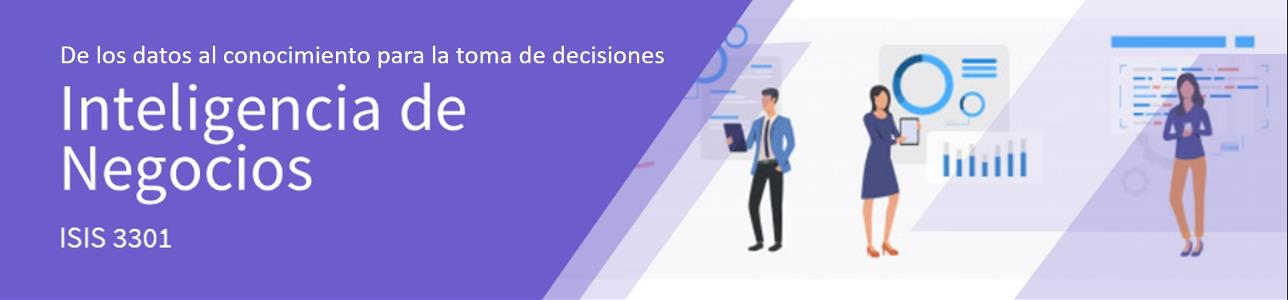

## Integrantes

* David Mateo Barbosa Monsalve - 202110756

* Santiago Páez - 202014644

* Luis Angel Angarita Coba - 201910393

# Importacion y carga de datos

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip install xlrd
! pip install pandas openpyxl


  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import nltk

import tabulate
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords

import re
from typing_extensions import *
from typing import *

import numpy as np
import pandas as pd
import re
import plotly.express as px

import ydata_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
GITHUB_URL: Final[str] = 'https://raw.githubusercontent.com/LoganTaurus/DB-Project-01/main/'

In [ ]:
sample_dataset: pd.DataFrame = pd.read_excel(GITHUB_URL + 'ODScat-345.xlsx')
data_s = sample_dataset.copy()
test_dataset: pd.DataFrame = pd.read_excel(GITHUB_URL + 'TestODScat-345.xlsx')
data_t = test_dataset.copy()

In [ ]:
import pandas as pd

# Leer el archivo XLSX
df = pd.read_excel(GITHUB_URL + 'ODScat-345.xlsx')

# Si hay problemas de codificación, puedes intentar corregirlos
df = df.applymap(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='ignore') if isinstance(x, str) else x)

# Guardar el archivo corregido
df.to_excel('archivo_corregido.xlsx', index=False)

<ipython-input-10-01996a99a97d>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.encode('latin1', errors='ignore').decode('utf-8', errors='ignore') if isinstance(x, str) else x)


# Sección 1. Entendimiento del negocio y enfoque analítico

In [ ]:
print(tabulate.tabulate(pd.read_csv(GITHUB_URL + 'business_understanding.csv', sep=';'), maxcolwidths=50, tablefmt='fancy_grid', showindex=False))

╒════════════════════════════════════════════════════╤════════════════════════════════════════════════════╕
│ Objetivos y criterios de éxito desde el punto de   │ El principal objetivo es automatizar la            │
│ vista del negocio                                  │ clasificación de opiniones ciudadanas en relación  │
│                                                    │ con los ODS 3, 4 y 5, utilizando técnicas de       │
│                                                    │ procesamiento de lenguaje natural (NLP) y          │
│                                                    │ aprendizaje automático. El éxito se medirá en      │
│                                                    │ función de la precisión del modelo, idealmente     │
│                                                    │ alcanzando al menos un 90% de precisión en la      │
│                                                    │ clasificación. Un criterio de éxito adicional      │
│                           

# Sección 2. Entendimiento de los datos

## Perfilamiento de los datos

In [ ]:
data_s

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
1,"En 2007, el gobierno central financió directam...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
...,...,...
4044,"Para ello, identificará las cuestiones de géne...",5
4045,La participación de las mujeres en roles de li...,5
4046,"Según el WEF, según las tendencias de 2016, po...",5
4047,"Sirve como recurso y foro para las agencias, c...",5


In [ ]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


In [ ]:
data_s['Conteo'] = [len(x) for x in data_s['Textos_espanol']]
data_s['Moda'] = [len(x) for x in data_s['Textos_espanol']]
data_s['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in data_s['Textos_espanol']]
data_s['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in data_s['Textos_espanol']]
data_s_profiler: ydata_profiling.ProfileReport = ydata_profiling.ProfileReport(data_s)

In [ ]:
#data_s_profiler

### Revisión de la dimensión e integridad de los datos

Primero se observa la vista original de datos antes de realizar las respectivas transformaciones.

In [ ]:
df.head()


,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas d...",3
1,"En 2007, el gobierno central financi directame...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3


Se observa que los datos estan conformados por dos columnas: una para las opiniones de los ciudadanos y los Objetivos de Desarrollo Sostenible(ODS). Este ultimo representaria una variable que varia entre 3 y 5 segun el enunciado

In [ ]:
print("\nRevisión de valores repetidos: ", df.duplicated().sum())
df.drop_duplicates()


Revisión de valores repetidos:  0


,Textos_espanol,sdg
0,"Por ejemplo, el número de consultas externas d...",3
1,"En 2007, el gobierno central financi directame...",3
2,"Claramente, hay muchos otros factores en juego...",3
3,"Por ejemplo, el estado australiano de Victoria...",3
4,"El consumo anual de alcohol se estima en 15,7 ...",3
...,...,...
4044,"Para ello, identificar las cuestiones de gnero...",5
4045,La participacin de las mujeres en roles de lid...,5
4046,"Segn el WEF, segn las tendencias de 2016, podr...",5
4047,"Sirve como recurso y foro para las agencias, c...",5


Hay 4049 filas de informacion dada por los ciudadanos, todos los valores son consistentes y validos. Ademas de esto se puede ver que no hay declaraciones repetidas lo cual nos sirve ya que en el modelo no considerara que la informacion de la primera columna tenga filas con mayor peso que otros. No sera necesario modificar nada para quitar duplicados.

### Revision categoricas

Revisaremos cuantos datos hay por cada ODS

In [ ]:
print("Conteo de clases: \n",df.sdg.value_counts())

Conteo de clases: 
 sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


In [ ]:
fig = px.histogram(df, x='sdg', title='Conteo de clases', color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()

fig = px.pie(df, names='sdg', title='Proporción de clases')
fig.show()


De las graficas anteriores podemos ver que es ODS 5 es la variable que predomina por encima de ODS 4 y 3 siendo esta ultima la de menor numero de registros.

### Analisis de longitud de textos

Se revisaran la longitus de los textos, esto con el fin de saber si la longitus de los textos nos pueden dar pistas sobre el ODS correspondiente. Puede que un nivel sea determinado a que los textos son cortos.

Para lograr lo anterior, añadiremos una nueva columna a los datos sobre la longitud del texto y asi poder sacar algunas estadisticas de la misma. Como se vera, la columna lleva el nombre de 'Longitud_original' dado que mas adelante se deberan hacer transformaciones sobre los textos que van a alterar su longitud.

In [ ]:
def text_length(tweet):

    word_count = len(tweet.split())
    return word_count


df['Longitud_original'] = df['Textos_espanol'].apply(text_length)
df.head()

,Textos_espanol,sdg,Longitud_original
0,"Por ejemplo, el número de consultas externas d...",3,160
1,"En 2007, el gobierno central financi directame...",3,78
2,"Claramente, hay muchos otros factores en juego...",3,186
3,"Por ejemplo, el estado australiano de Victoria...",3,164
4,"El consumo anual de alcohol se estima en 15,7 ...",3,173


In [ ]:
df['Longitud_original'].describe()

,Longitud_original
count,4049.000000
mean,110.294147
std,36.291055
min,37.000000
25%,83.000000
50%,104.000000
75%,130.000000
max,260.000000


In [ ]:
graph = px.histogram(df,x='Longitud_original',marginal='box',title="Longitud de textos originales")
graph.update_layout(bargap=0.1)
graph.show()

Podemos ver que la longitus sigue una distribucion normal por la forma y que hay varios datos que se alejan bastante del promedio



In [ ]:
df.groupby('sdg')['Longitud_original'].agg(['mean','max','min'])

,mean,max,min
sdg,,,
3,109.823151,238,38
4,106.351551,260,48
5,114.376981,245,37


Se puede ver que los textos con ODS 5 tienen en promedio mayor longitud ya que pueden ser mas descriptivas que las demas

Una vez hemos entendido las dimensión y comportamiento de las reseñas y sus clasificaciones es necesario que entremos a limpiar los textos de toda clase de los 'stopwords' o palabras vacias. Adicional esto tambien limpieramos las 'fillerwords' que son como muletillas de manera escrita

Tambien se eliminaran caracteres especiales o formatos extraños que puedan afectar el modelo. Por ultimo, se usa la funcion 'lemmatizer' para dejar las palabras en su forma base o infinitiva. Esto se hace con el fin de que el modelo no tome como diferentes palabras con el mismo significado pero con diferente conjugación.

## Análisis de calidad de los datos

### Unicidad

In [ ]:
# Verificar si hay filas duplicadas en términos de las columnas 'Textos_espanol' y 'sdg'
duplicados = data_s.duplicated(subset=['Textos_espanol', 'sdg'])

# Mostrar cuántas filas duplicadas hay
num_duplicados = duplicados.sum()

print(f"Número de filas duplicadas: {num_duplicados}")

# Si quieres ver las filas duplicadas
filas_duplicadas = data_s[duplicados]
filas_duplicadas

Número de filas duplicadas: 0


,Textos_espanol,sdg,Conteo,Moda,Max,Min


### Completitud

In [ ]:
# Verificar la cantidad de valores nulos en las columnas 'Textos_espanol' y 'sdg'
valores_nulos = data_s.isnull().sum()

print("Cantidad de valores nulos por columna:")
print(valores_nulos)

# Verificar si hay filas en las que 'Textos_espanol' o 'sdg' estén vacíos (en caso de ser strings vacíos)
textos_vacios = (data_s['Textos_espanol'].str.strip() == '').sum()
sdg_vacios = (data_s['sdg'].astype(str).str.strip() == '').sum()

print(f"Filas con 'Textos_espanol' vacío: {textos_vacios}")
print(f"Filas con 'sdg' vacío: {sdg_vacios}")


Cantidad de valores nulos por columna:
Textos_espanol    0
sdg               0
Conteo            0
Moda              0
Max               0
Min               0
dtype: int64
Filas con 'Textos_espanol' vacío: 0
Filas con 'sdg' vacío: 0


### Consistencia

In [ ]:
# Verificar si los valores en la columna 'sdg' están dentro del rango permitido (3, 4 o 5)
valores_invalidos_sdg = data_s[~data_s['sdg'].isin([3, 4, 5])]

# Mostrar cuántos valores inválidos hay en la columna 'sdg'
num_valores_invalidos_sdg = len(valores_invalidos_sdg)
print(f"Número de valores inválidos en 'sdg': {num_valores_invalidos_sdg}")

# Si quieres ver los registros con valores inválidos en 'sdg'
if num_valores_invalidos_sdg > 0:
    print("Registros con valores inválidos en 'sdg':")
    print(valores_invalidos_sdg)

Número de valores inválidos en 'sdg': 0


In [ ]:
# Verificar que la columna 'Textos_espanol' no contenga valores que no sean cadenas de texto
valores_invalidos_textos = data_s[~data_s['Textos_espanol'].apply(lambda x: isinstance(x, str))]

# Mostrar cuántos valores inválidos hay en la columna 'Textos_espanol'
num_valores_invalidos_textos = len(valores_invalidos_textos)
print(f"Número de valores inválidos en 'Textos_espanol': {num_valores_invalidos_textos}")

# Si quieres ver los registros con valores inválidos en 'Textos_espanol'
if num_valores_invalidos_textos > 0:
    print("Registros con valores inválidos en 'Textos_espanol':")
    print(valores_invalidos_textos)

# Eliminar caracteres no deseados en la columna 'Textos_espanol'
# Aquí eliminamos cualquier carácter que no sea letra, número o espacio
import re
data_s['Textos_espanol'] = data_s['Textos_espanol'].apply(lambda x: re.sub(r'[^A-Za-z0-9\sáéíóúÁÉÍÓÚñÑ]', '', x))

Número de valores inválidos en 'Textos_espanol': 0


### Validez

In [ ]:
# Verificar que todos los valores en 'Textos_espanol' sean cadenas de texto
valores_no_textuales = data_s[~data_s['Textos_espanol'].apply(lambda x: isinstance(x, str))]

# Mostrar cuántos valores no textuales hay en 'Textos_espanol'
num_valores_no_textuales = len(valores_no_textuales)
print(f"Número de valores no textuales en 'Textos_espanol': {num_valores_no_textuales}")

# Si quieres ver los registros con valores no textuales en 'Textos_espanol'
if num_valores_no_textuales > 0:
    print("Registros con valores no textuales en 'Textos_espanol':")
    print(valores_no_textuales)

# Eliminar registros donde 'Textos_espanol' no sea una cadena de texto
data_s = data_s[data_s['Textos_espanol'].apply(lambda x: isinstance(x, str))]


Número de valores no textuales en 'Textos_espanol': 0


In [ ]:
# Verificar que todos los valores en 'sdg' sean enteros
valores_no_enteros = data_s[~data_s['sdg'].apply(lambda x: isinstance(x, int))]

# Mostrar cuántos valores no enteros hay en 'sdg'
num_valores_no_enteros = len(valores_no_enteros)
print(f"Número de valores no enteros en 'sdg': {num_valores_no_enteros}")

# Si quieres ver los registros con valores no enteros en 'sdg'
if num_valores_no_enteros > 0:
    print("Registros con valores no enteros en 'sdg':")
    print(valores_no_enteros)

# Eliminar registros donde 'sdg' no sea un entero
data_s = data_s[data_s['sdg'].apply(lambda x: isinstance(x, int))]

# Verificar que los valores en 'sdg' estén dentro del rango válido (3, 4 o 5)
data_s = data_s[data_s['sdg'].isin([3, 4, 5])]


Número de valores no enteros en 'sdg': 0


# Preparación de datos

## Limpieza de textos

In [ ]:
import string

def data_cleaning(data):
    cleaned_data = []
    fillerWord =  ("Eh","Mmm","Pues","Bueno","Este","Como","Entonces","O sea","Tipo","¿Sabes?","En fin","¿Entiendes?","Vale","La cosa es que", "¿Verdad?")
    fillerword_reg= r"\b(Eh|Mmm|Pues|Bueno|Este|Como|Entonces|O\s+sea|Tipo|¿Sabes?|En\s+fin|¿Entiendes?|Vale|La\s+cosa\s+es\s+que|¿Verdad?)\b"
    STOPWORDS = set(stopwords.words('spanish'))
    remove = ["no", "ni", "tampoco", "jamás", "nunca", "nadie", "ninguno", "ningún", "nada"]
    for i in remove:
        STOPWORDS.discard(i)

    STOPWORDS.add(fillerWord)
    for i in range(len(data)):
        rev = re.sub("#", "", data[i])
        rev = re.sub(r'^https?:\/\/.*[\r\n]*', '',rev, flags=re.MULTILINE)
        html=re.compile(r'<.*?>')
        rev =html.sub(r"", rev)
        rev=re.sub(r'@\w+',"",rev)
        rev=re.sub(r'#\w+',"",rev)
        rev=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', rev)
        punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
        rev.rstrip(string.punctuation)
        rev=re.sub('[^A-Za-z\s]+',"", rev)
        rev = rev.lower()
        rev = rev.split()
        rev = [lemmatizer.lemmatize(word) for word in rev if not word in STOPWORDS]
        rev = ' '.join(rev)
        filler=re.compile(fillerword_reg)
        rev=filler.sub("",rev)
        cleaned_data.append(rev)
    return cleaned_data

In [ ]:

text_data = df['Textos_espanol'].tolist()

texto_procesado = data_cleaning(text_data)

limpio = pd.DataFrame(texto_procesado)

df['Texto_limpio'] = limpio

df.head()

,Textos_espanol,sdg,Longitud_original,Texto_limpio
0,"Por ejemplo, el número de consultas externas d...",3,160,ejemplo nmero consultas externas especialistas...
1,"En 2007, el gobierno central financi directame...",3,78,gobierno central financi directamente solo gas...
2,"Claramente, hay muchos otros factores en juego...",3,186,claramente factores juego particular variedad ...
3,"Por ejemplo, el estado australiano de Victoria...",3,164,ejemplo australiano victoria cre agencia promo...
4,"El consumo anual de alcohol se estima en 15,7 ...",3,173,consumo anual alcohol estima litros ao hombre ...


Ahora que se han modificado los texto procedemos a comparar la longitud nueva con la original

In [ ]:
df['Longitud_nuevo']= df['Texto_limpio'].apply(lambda x:text_length(x))

df['Longitud_nuevo']= df['Texto_limpio'].apply(lambda x:text_length(x))

df.head()

,Textos_espanol,sdg,Longitud_original,Texto_limpio,Longitud_nuevo
0,"Por ejemplo, el número de consultas externas d...",3,160,ejemplo nmero consultas externas especialistas...,83
1,"En 2007, el gobierno central financi directame...",3,78,gobierno central financi directamente solo gas...,41
2,"Claramente, hay muchos otros factores en juego...",3,186,claramente factores juego particular variedad ...,102
3,"Por ejemplo, el estado australiano de Victoria...",3,164,ejemplo australiano victoria cre agencia promo...,90
4,"El consumo anual de alcohol se estima en 15,7 ...",3,173,consumo anual alcohol estima litros ao hombre ...,75


In [ ]:
print(df.Longitud_nuevo.describe())

graph = px.histogram(df,x='Longitud_nuevo', marginal='box',title="Longitud de las reseñas limpias",color_discrete_sequence=['blue'])
graph.update_layout(bargap=0.1)
graph.show()

count    4049.000000
mean       57.807607
std        18.976616
min        22.000000
25%        44.000000
50%        54.000000
75%        68.000000
max       133.000000
Name: Longitud_nuevo, dtype: float64


Podemos apreciar que se han acortado la longitud de los textos pero aun siguen existiendo valores demasiado alejados del promedio.

## Division de entrenamiento y prueba

Se deben separar los datos de prueba en dos grupos, uno que contiene los textos modificados y otro que contiene la ODS respectiva. Esto se debe hacer dado que el algoritmo necesita estos parametros por separado.

In [ ]:
X = df.Texto_limpio
Y = df.sdg
Y = pd.DataFrame(Y,columns=['sdg'])

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = pd.DataFrame(Y,columns=['Class'])
Y.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,Class
0,0
1,0
2,0
3,0
4,0


## Inicializacion

### Bag of words

Para inicializar el modelo se realizaran dos inicializacions distintas que luego se explicaran as a detalle. Primero está bag of words y luego Tfid.

El "Bag of Words" (BoW) es una técnica común en el procesamiento de lenguaje natural que transforma textos en vectores numéricos basados en la frecuencia de aparición de palabras individuales, sin considerar el orden ni la gramática. El proceso comienza tokenizando el texto, lo que significa dividirlo en palabras o términos individuales. Luego, se crea un vocabulario único que abarca todas las palabras distintas en el conjunto de documentos. Cada documento se representa entonces como un vector que indica cuántas veces aparece cada palabra del vocabulario en ese documento. Esta representación es útil para realizar análisis estadísticos y aplicar modelos de aprendizaje automático en tareas como la clasificación de textos y el análisis de sentimientos. Sin embargo, BoW no tiene en cuenta la estructura del lenguaje ni el significado contextual de las palabras, lo que puede limitar su efectividad en algunos casos.

In [ ]:
Y['Class'].unique()

array([0, 1, 2])

In [ ]:
vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
# fit the model for training data
X_data = vectorizer.fit_transform(X)

In [ ]:
X_data.shape

(4049, 3000)

In [ ]:
Y.shape

(4049, 1)

### Tfid

El método TF-IDF (Frecuencia de Término-Frecuencia Inversa de Documento) es una técnica empleada en el procesamiento de lenguaje natural que convierte texto en representaciones numéricas que son más útiles para el análisis. Este método evalúa la relevancia de una palabra dentro de un documento considerando dos aspectos: la frecuencia de la palabra en el documento y su rareza en el conjunto de documentos. Asigna valores numéricos a cada término, lo que refleja su importancia en el documento específico en comparación con el corpus completo. Así, los documentos se representan como vectores numéricos, lo que permite su uso en algoritmos de aprendizaje automático para tareas como la clasificación de texto y la recuperación de información

In [ ]:
transformer = TfidfTransformer()
X_data = transformer.fit_transform(X_data).toarray()

# Sección 3. Modelado y evaluación

# Modelo - Naives Bayes

## Entrenamiento Modelo

Para entrenar el modelo, se utilizan dos tecnicas que se explicaran mas adelante que son Train-test slipt y HyperParameter Tuning

### Train- test slipt

La función train_test_split juega un papel crucial en el aprendizaje automático al separar un conjunto de datos en dos subconjuntos distintos: uno para el entrenamiento del modelo y otro para su evaluación. Este proceso implica dividir aleatoriamente los datos, asignando una parte al conjunto de entrenamiento y el resto al conjunto de prueba.

El conjunto de entrenamiento se utiliza para ajustar los parámetros del modelo, mientras que el conjunto de prueba sirve para evaluar cómo se desempeña el modelo con datos que no ha visto previamente. Esta separación es esencial para prevenir el sobreajuste, es decir, el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento y pierda capacidad para generalizar con datos nuevos.

Al ofrecer una evaluación independiente del rendimiento del modelo, train_test_split permite estimar la capacidad de generalización del modelo y facilita la comparación entre diferentes configuraciones o algoritmos, ayudando así a seleccionar la mejor opción para el problema en cuestión.









In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_data, Y, test_size=0.33,random_state = 15)
model1 = MultinomialNB()
y_train_pred = model1.fit(X1_train,y1_train.Class).predict(X1_train)

y_pred = model1.predict(X1_test)

from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy(in %):", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy(in %):", metrics.accuracy_score(y1_test, y_pred)*100)


Multinomial Naive Bayes model train accuracy(in %): 98.41445427728614
Multinomial Naive Bayes model test accuracy(in %): 96.70905011219148


### HyperParameter Tuning

La optimización de hiperparámetros, también conocida como "Hyperparameter Tuning", es un proceso fundamental en el aprendizaje automático que se enfoca en identificar la mejor combinación de valores para los hiperparámetros de un modelo con el objetivo de maximizar su rendimiento predictivo. Los hiperparámetros son configuraciones predefinidas que no se ajustan automáticamente durante el entrenamiento del modelo, pero que influyen significativamente en cómo el modelo se ajusta a los datos y en su capacidad para generalizar a nuevos ejemplos.

Entre los ejemplos típicos de hiperparámetros se encuentran la tasa de aprendizaje en algoritmos de aprendizaje profundo, la profundidad máxima de un árbol de decisión y los valores de regularización en modelos de regresión. Para llevar a cabo la optimización de hiperparámetros, se utilizan diversas técnicas, como la búsqueda en cuadrícula (grid search), la búsqueda aleatoria y métodos más avanzados como la optimización bayesiana.

El propósito de este proceso es encontrar la configuración óptima de hiperparámetros que maximice el rendimiento del modelo en un conjunto de datos de validación independiente. Una vez logrado, esto mejora tanto la precisión del modelo como su capacidad de generalización, resultando en mejores desempeños en las tareas de aprendizaje automático.









In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01,1,10],}

cuadricula= GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
cuadricula.fit(X_data,Y)

print(' Precision entrenado : %.3f'%cuadricula.best_estimator_.score(X1_train, y1_train))
print('Precision prueba : %.3f'%cuadricula.best_estimator_.score(X1_test, y1_test))
print('Mejor precision : %.3f'%cuadricula.best_score_)
print('Mejores parametros : ',cuadricula.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Precision entrenado : 0.983
Precision prueba : 0.978
Mejor precision : 0.967
Mejores parametros :  {'alpha': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



## Sección 4. Evaluacion del modelo

### Analisis cuantitativo

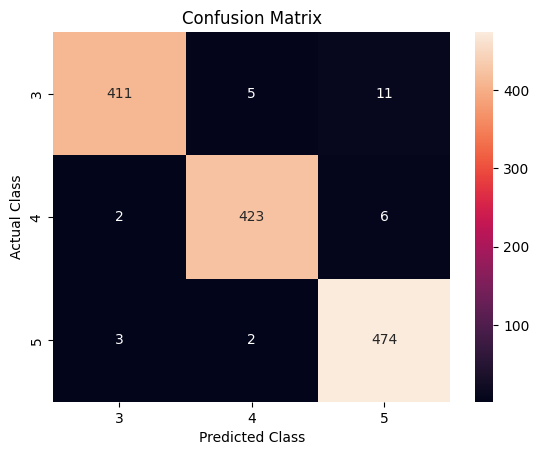

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = cuadricula.predict(X1_test)
cm = confusion_matrix(y1_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')


plt.show()

La matriz tiene 3 filas y 3 columnas, lo que indica que se trata de un problema de clasificación multiclase con 3 clases distintas (3, 4 y 5).

Ejes de la Matriz: En la matriz, el eje X representa las clases predichas por el modelo, mientras que el eje Y muestra las clases reales de las observaciones.


* **Primera fila(ODS 3)**

 *   411: El modelo predijo correctamente la clase 3 en 411 ocasiones.
 * 5: El modelo predijo la clase 4 cuando la clase real era 3 en 5 ocasiones.
 * 11: El modelo predijo la clase 5 cuando la clase real era 3 en 11 ocasiones.

*   **Segunda fila(ODS 4)**
 * 2: El modelo predijo la clase 3 cuando la clase real era 4 en 2 ocasiones.
 * 423: El modelo predijo correctamente la clase 4 en 423 ocasiones.
 * 6: El modelo predijo la clase 5 cuando la clase real era 4 en 6 ocasiones.
*   **texto en negrita(ODS 5)**
 * 3: El modelo predijo la clase 3 cuando la clase real era 5 en 3 ocasiones.
 * 2: El modelo predijo la clase 4 cuando la clase real era 5 en 2 ocasiones.
 * 474: El modelo predijo correctamente la clase 5 en 474 ocasiones.

Los valores en la diagonal principal de la matriz (411, 423, 474) representan los casos en los que el modelo predijo correctamente la clase. Estos valores indican los aciertos del modelo. Por otro lado, los números fuera de la diagonal (como 5, 11, 2, 6, 3, 2) representan las predicciones incorrectas, es decir, los errores del modelo donde se predijo una clase diferente a la clase real.

La mayoría de las predicciones están en la diagonal principal, lo que se puede afirmar que el modelo tiene una alta precisión en la clasificación de las clases. Aunque existen algunos errores de clasificación, como la predicción incorrecta de la clase 5 como 3, estos son relativamente pocos en comparación con el número total de predicciones correctas. En particular, la clase 5 parece ser la mejor clasificada, con 474 predicciones correctas y solo 5 errores (3 predicciones incorrectas como 3 y 2 como 4).






### Analisis cualitativo

Para este analisis, se tendran en cuenta las siguientes metricas:

**Precision**: La precisión es la proporción de predicciones correctas a comparacion de las totales realizadas por el modelo. En este caso, las precisiones van desde un 97% para la clase 5 hasta un 99% para la clase 3. Esto indica la capacidad del modelo para identificar correctamente cada clase.

**Recall**: El recall, también conocido como sensibilidad, es la proporción de instancias correctamente identificadas por el modelo en relación con el total de instancias. Las tasas de recall estan entre un 96% de la clase3 y un 99% de la clase 5. Esto indica la capacidad del modelo para capturar correctamente todas las instancias de cada clase.

**F1-score**: El F1-score es la media que combina ambos aspectos tanto precisión como el recall de la evaluación del modelo. Varía entre 0 y 1, donde 1 representa la mejor puntuación posible. Los valores de F1-score se mantienen en un 98% en todas las clases

**Support**: La cantidad de muestras de cada clase en el conjunto de datos de prueba.

**Accuracy**: La precisión global del modelo, que es la proporción de predicciones correctas respecto al total de predicciones realizadas. En este caso, la precisión global es del 98%.

**Macro avg y Weighted avg**: La media de las métricas de precision, recall y F1-score, calculadas para cada clase.

In [ ]:

from sklearn.metrics import classification_report
target_names = [str(class_name) for class_name in encoder.classes_]

print(classification_report(y1_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.99      0.96      0.98       427
           4       0.98      0.98      0.98       431
           5       0.97      0.99      0.98       479

    accuracy                           0.98      1337
   macro avg       0.98      0.98      0.98      1337
weighted avg       0.98      0.98      0.98      1337



Se puede notar en el modelo es bastante bueno para clasificar todos los tipos de ODS, esto sugiere que hay palabras que pueden marcar gran diferencia en estos objetivos de desarrollo sostenible.

### Palabras significativas

In [ ]:

probabilities = model1.feature_log_prob_[1]
names = vectorizer.get_feature_names_out()

probabilities_words = list(zip(names, probabilities))
probabilities_words_sorted = sorted(probabilities_words, key=lambda x: x[1], reverse=True)

num_palabras_a_mostrar = 10
palabras_con_mayores_coeficientes = probabilities_words_sorted[:num_palabras_a_mostrar]
for palabra, log_probabilidad in palabras_con_mayores_coeficientes:
    print(f"Palabra:{palabra}, Log Probabilidad: {log_probabilidad}")


Palabra:educacin, Log Probabilidad: -4.96122043898301
Palabra:estudiantes, Log Probabilidad: -5.059736132910661
Palabra:escuelas, Log Probabilidad: -5.187100461267654
Palabra:aprendizaje, Log Probabilidad: -5.4256519732814406
Palabra:docentes, Log Probabilidad: -5.537313924633853
Palabra:alumnos, Log Probabilidad: -5.5868106955718275
Palabra:evaluacin, Log Probabilidad: -5.627317605197717
Palabra:escuela, Log Probabilidad: -5.7158727246012555
Palabra:profesores, Log Probabilidad: -5.819295913113921
Palabra:ocde, Log Probabilidad: -5.820406362700293


Como se puede ver, las palabras relacionadas con:


* educacion
* estudiantes
* escuelas
* aprendizaje
* docentes
* alumnos
* evaluacion
* escuela
* profesores

Son determinantes para la clasificaicon de los textos.

Solamente se muestran los pprimeros 10 pero hay palabras relevantes que usaremos para el analisis

Se puede ver que las palabras más repetidas están relacionadas con el contenido de cada ODS. En primer lugar, tenemos palabras como “salud”,” enfermedades”,” pacientes”, “médicos”, “mortalidad” lo denota que los problemas asociados con el ODS 3 se basan en las enfermedades y la posible mortalidad de los habitantes. Por otro lado, tenemos palabras como “educación”, “estudiantes”, “docentes", "alumnos”, “evaluacion” que evidencia que un objetivo basado en el ODS 4 es enfocarse en los actores de la educación como los docentes o estudiantes ya que de estos depende que el sistema educativo sea optimo. Por último, tenemos “genero” y “mujeres” de la ODS 5 que tal vez no es algo que tengan en enfocado como objetivo debido a que son palabras menos frecuentes a los demás ODS.



# Modelo - Logistic Regression

### Train- test slipt

Se realiza la división de los datos en conjuntos de entrenamiento y prueba mediante train_test_split, asignando el 33% de los datos al conjunto de prueba. Las etiquetas se ajustan a un formato unidimensional para evitar advertencias. Luego, se entrena un modelo de Regresión Logística en los datos de entrenamiento (X2_train y y2_train) y se generan predicciones tanto para el conjunto de entrenamiento como para el conjunto de prueba. Finalmente, se calculan las precisiones del modelo en ambos conjuntos para evaluar su rendimiento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
# División de los datos para el modelo 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X_data, Y, test_size=0.33, random_state=15)

# Ajustar las etiquetas para eliminar la advertencia (convertir a arrays unidimensionales)
y2_train = y2_train.values.ravel()
y2_test = y2_test.values.ravel()

# Entrenamiento del modelo 2 (Regresión Logística)
model2 = LogisticRegression()
y2_train_pred = model2.fit(X2_train, y2_train).predict(X2_train)

# Predicciones para el conjunto de prueba
y2_pred = model2.predict(X2_test)

# Evaluación del modelo 2
print("Logistic Regression model 2 train accuracy (in %):", metrics.accuracy_score(y2_train, y2_train_pred) * 100)
print("Logistic Regression model 2 test accuracy (in %):", metrics.accuracy_score(y2_test, y2_pred) * 100)


Logistic Regression model 2 train accuracy (in %): 99.59439528023599
Logistic Regression model 2 test accuracy (in %): 97.5317875841436


### HyperParameter Tuning para Logistic Regression

Se utiliza GridSearchCV para encontrar los mejores hiperparámetros del modelo de Regresión Logística. En este caso, se ajustan los valores de regularización C, el tipo de penalización penalty (L1 o L2), y el solucionador liblinear. La búsqueda se realiza a través de diferentes combinaciones de estos parámetros, utilizando validación cruzada con 5 particiones (cv=5). Al final, se seleccionan los hiperparámetros que maximizan la precisión del modelo en los conjuntos de entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el rango de hiperparámetros para la Regresión Logística
params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Hiperparámetro de regularización
    'penalty': ['l1', 'l2'],        # Tipo de regularización
    'solver': ['liblinear']          # Resolver que soporta 'l1' y 'l2'
}

# Configuración de GridSearchCV
cuadricula2 = GridSearchCV(LogisticRegression(), param_grid=params, n_jobs=-1, cv=5, verbose=5)

# Entrenar el modelo con los datos
cuadricula2.fit(X2_train, y2_train)

# Resultados de la búsqueda de hiperparámetros
print('Precisión en el conjunto de entrenamiento: %.3f' % cuadricula2.best_estimator_.score(X2_train, y2_train))
print('Precisión en el conjunto de prueba: %.3f' % cuadricula2.best_estimator_.score(X2_test, y2_test))
print('Mejor precisión obtenida: %.3f' % cuadricula2.best_score_)
print('Mejores hiperparámetros encontrados: ', cuadricula2.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Precisión en el conjunto de entrenamiento: 0.999
Precisión en el conjunto de prueba: 0.975
Mejor precisión obtenida: 0.982
Mejores hiperparámetros encontrados:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


## Sección 4. Evaluacion del modelo

### Analisis cuantitativo

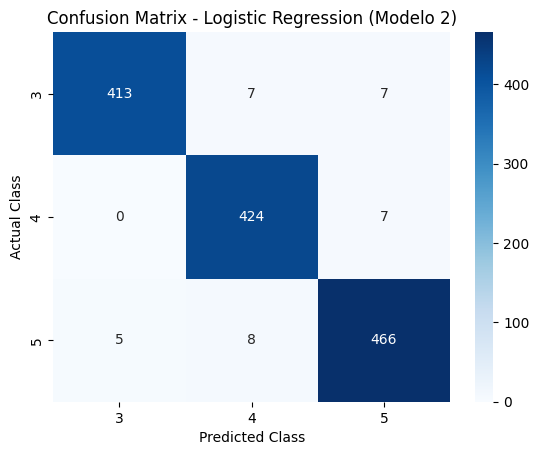

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar predicciones con el mejor estimador del modelo 2
y2_pred = cuadricula2.predict(X2_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y2_test, y2_pred)

# Visualizar la matriz de confusión con un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')

plt.title('Confusion Matrix - Logistic Regression (Modelo 2)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

# Mostrar la matriz de confusión
plt.show()


* **Primera fila(ODS 3)**

En la primera fila de la matriz, podemos ver que 413 ejemplos pertenecientes a la clase 3 fueron clasificados correctamente. Sin embargo, hubo 7 ejemplos de la clase 3 que fueron erróneamente clasificados como clase 4 y 7 ejemplos que fueron clasificados incorrectamente como clase 5. Este resultado indica que la Regresión Logística tiene un buen desempeño con la clase 3, pero aún existe un nivel bajo de confusión con las clases 4 y 5.

*   **Segunda fila(ODS 4)**

En la segunda fila, podemos observar que 424 ejemplos de la clase 4 fueron clasificados correctamente, y no hubo ejemplos clasificados erróneamente como clase 3. Sin embargo, 7 ejemplos de la clase 4 fueron mal clasificados como clase 5. El modelo es bastante preciso en la clasificación de la clase 4, pero aún hay una pequeña confusión con la clase 5.

*   **Tercera fila(ODS 5)**

Finalmente, en la tercera fila, vemos que 466 ejemplos de la clase 5 fueron clasificados correctamente. Sin embargo, 5 ejemplos de la clase 5 fueron mal clasificados como clase 3 y 8 ejemplos como clase 4. Si bien la mayoría de los ejemplos de la clase 5 fueron clasificados correctamente, el modelo muestra una ligera confusión con las clases 3 y 4.

En general, el modelo tiene un buen rendimiento en la clasificación de las tres clases, con una precisión alta en cada una de ellas. La mayor confusión se observa entre las clases 3 y 5, así como entre las clases 4 y 5, lo cual puede deberse a características compartidas entre estos conjuntos de datos. Sin embargo, la cantidad de errores de clasificación es baja en comparación con los aciertos, lo que sugiere que el modelo de Regresión Logística está funcionando correctamente, aunque con algunas áreas donde podría mejorarse la discriminación entre clases.


### Analisis cualitativo

In [ ]:
from sklearn.metrics import classification_report
target_names = [str(class_name) for class_name in encoder.classes_]

print(classification_report(y2_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

           3       0.99      0.97      0.98       427
           4       0.97      0.98      0.97       431
           5       0.97      0.97      0.97       479

    accuracy                           0.97      1337
   macro avg       0.97      0.97      0.97      1337
weighted avg       0.97      0.97      0.97      1337



Para este analisis, se tendran en cuenta las siguientes metricas:

**Precision**: La precisión es la proporción de predicciones correctas a comparacion de las totales realizadas por el modelo. En este caso, ODS 3 tiene la mayor precisión con un 99%, lo que indica que el modelo rara vez comete errores al predecir esta clase. ODS 4 y ODS 5 tienen una precisión del 97%, lo que refleja un buen rendimiento, pero con una ligera confusión entre estas dos clases.

**Recall**: El recall, también conocido como sensibilidad, es la proporción de instancias correctamente identificadas por el modelo en relación con el total de instancias. ODS 4 tiene la mejor recuperación con un 98%, lo que significa que el modelo identifica casi todos los ejemplos de esta clase. ODS 3 y ODS 5 tienen una recuperación del 97%, lo que indica que el modelo encuentra la mayoría de los ejemplos, pero no todos.

**F1-score**: El F1-score es la media que combina ambos aspectos tanto precisión como el recall de la evaluación del modelo. Varía entre 0 y 1, donde 1 representa la mejor puntuación posible. ODS 3 presenta el f1-score más alto con un 0.98, lo que refleja un buen equilibrio entre precisión y recuperación.
ODS 4 y ODS 5 tienen un f1-score de 0.97, lo que indica un desempeño sólido, aunque ligeramente inferior al de la clase 3.

**Support**: La cantidad de muestras de cada clase en el conjunto de datos de prueba.

**Accuracy**: La precisión global del modelo, que es la proporción de predicciones correctas respecto al total de predicciones realizadas. En este caso, la precisión global es del 97%.

### Palabras significativas

In [ ]:
# Obtener los coeficientes del modelo y las características (palabras)
coeficientes = model2.coef_[0]  # coef_ devuelve un array por clase, ajustamos a la clase 0 en este ejemplo
names = vectorizer.get_feature_names_out()

# Emparejar las palabras con sus coeficientes
coeficientes_palabras = list(zip(names, coeficientes))

# Ordenar las palabras por los coeficientes más altos (en términos absolutos)
coeficientes_palabras_sorted = sorted(coeficientes_palabras, key=lambda x: np.abs(x[1]), reverse=True)

# Número de palabras más significativas a mostrar
num_palabras_a_mostrar = 10

# Mostrar las palabras más significativas
palabras_con_mayores_coeficientes = coeficientes_palabras_sorted[:num_palabras_a_mostrar]
for palabra, coeficiente in palabras_con_mayores_coeficientes:
    print(f"Palabra: {palabra}, Coeficiente: {coeficiente}")

Palabra: salud, Coeficiente: 4.77362632457497
Palabra: mujeres, Coeficiente: -3.2479169201563423
Palabra: atencin, Coeficiente: 3.1435811111801915
Palabra: educacin, Coeficiente: -2.9588951972262327
Palabra: gnero, Coeficiente: -2.880441547535671
Palabra: pacientes, Coeficiente: 2.22097995801211
Palabra: enfermedades, Coeficiente: 1.94023394988994
Palabra: estudiantes, Coeficiente: -1.851485965157678
Palabra: mdicos, Coeficiente: 1.819435213133996
Palabra: mortalidad, Coeficiente: 1.7363663276969703


A continuación se presentan las 10 palabras más significativas encontradas en el **modelo 2** (Regresión Logística), junto con sus coeficientes. Estas palabras tienen el mayor impacto en la clasificación de los textos, ya sea de forma positiva o negativa.

| Palabra      | Coeficiente          |
|--------------|----------------------|
| **salud**        | 4.7736               |
| **mujeres**      | -3.2479              |
| **atencin**      | 3.1436               |
| **educacin**     | -2.9589              |
| **gnero**        | -2.8804              |
| **pacientes**    | 2.2210               |
| **enfermedades** | 1.9402               |
| **estudiantes**  | -1.8515              |
| **mdicos**       | 1.8194               |
| **mortalidad**   | 1.7364               |

Interpretación:
- Palabras con **coeficientes positivos**, como "salud", "atencin", y "pacientes", tienen una mayor probabilidad de estar asociadas a ciertas clases en el modelo, como la clase ODS 3 (relacionada con la salud).
- Palabras con **coeficientes negativos**, como "mujeres", "educacin", y "gnero", están más asociadas con otras clases como la ODS 4 (educación) o la ODS 5 (igualdad de género).

Estas palabras representan los términos más influyentes que el modelo utiliza para hacer la clasificación entre los diferentes ODS.

# Modelo - Random Forest

Debido a la naturaleza diferente del modelo random forest se opta por una preparacion de los datos diferente

In [ ]:
import collections
import itertools
import string

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import regex as re
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from ydata_profiling import ProfileReport
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
try:
  sample_dataset: pd.DataFrame = pd.read_excel('Fixed-ODScat-345.xlsx')
  test_dataset: pd.DataFrame = pd.read_excel('Fixed-TestODScat-345.xlsx')
except FileNotFoundError:
  _encoding_fixer: Callable[[Any], Any] = lambda x: x.encode('latin-1', errors='ignore').decode('utf-8', errors='ignore') if isinstance(x, str) else x
  sample_dataset: pd.DataFrame = pd.read_excel(GITHUB_URL + 'ODScat-345.xlsx')
  sample_dataset = sample_dataset.applymap(_encoding_fixer)
  sample_dataset.to_excel('Fixed-ODScat-345.xlsx', index=False)
  test_dataset: pd.DataFrame = pd.read_excel(GITHUB_URL + 'TestODScat-345.xlsx')
  test_dataset = test_dataset.applymap(_encoding_fixer)
  test_dataset.to_excel('Fixed-TestODScat-345.xlsx', index=False)
  del _encoding_fixer

In [ ]:
spanish_stopwords: Final[set[str]] = set(stopwords.words('spanish'))
train_dataset: pd.DataFrame = pd.get_dummies(sample_dataset.copy(), columns=['sdg']).rename(columns={'Textos_espanol': 'spanish_text'})
train_dataset['length'] = list(map(len, train_dataset['spanish_text']))
train_dataset['words_count'] = list(map(len, map(str.split, train_dataset['spanish_text'])))
train_dataset['punctuation_count'] = train_dataset['spanish_text'].str.count(r'[!?.]')
train_dataset['lexical_density'] = train_dataset['spanish_text'].apply(lambda x: len(set(x.split())) / len(x.split()) if len(x.split()) > 0 else 0)
train_dataset['stopwords_count'] = train_dataset['spanish_text'].apply(lambda x: len([word for word in x.lower().split() if word in spanish_stopwords]))
train_dataset['stopwords_ratio'] = train_dataset['stopwords_count'] / train_dataset['words_count']
train_dataset = train_dataset[[column for column in train_dataset.columns if not column.startswith('sdg')] + [column for column in train_dataset.columns if column.startswith('sdg')]]

In [ ]:
sample_dataset.sample(20)

,Textos_espanol,sdg
3274,El poder descentralizado en el sistema escolar...,4
3435,"Adems, el 47% de las mujeres mexicanas que han...",5
279,Mientras que la tasa de empleo de las personas...,3
256,Italia lanz en 2000 el Programa Nacional de Ed...,3
2073,Si bien muchas de ellas prevén la igualdad de ...,5
2267,Una ley clave que aprobamos durante mi mandato...,5
405,Las proporciones que recibieron psicoterapia f...,3
1853,Kennisnet se basa en la demanda y monitorea co...,4
1649,Los criterios y mtodos de evaluacin los define...,4
476,"En Portugal, las Autoridades Sanitarias Region...",3


## Preparacion de los datos

In [ ]:
WORDS_USED: Final[int] = 100

In [ ]:
stemmer: SnowballStemmer = SnowballStemmer("spanish")

def cleanup(text: str) -> str:
  for letter, translate in {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ñ': 'ni'}.items():
    text = text.replace(letter, translate)
  text = re.sub(fr'[{re.escape(string.punctuation)}]', '', text, re.UNICODE)
  text = re.sub(r'([a-z])(\d)', '\1 \2', text, re.UNICODE)
  text = re.sub(r'(\d)([a-z])', '\1 \2', text, re.UNICODE)
  return text

def tokenizer(text: str) -> list[str]:
  return [token for token in word_tokenize(cleanup(text.lower())) if token not in spanish_stopwords]

In [ ]:
train_dataset['tokenized_text'] = train_dataset['spanish_text'].apply(tokenizer)

In [ ]:
common_tokens: list[str] = [token for token, amount in collections.Counter(itertools.chain(*train_dataset['tokenized_text'])).most_common(WORDS_USED)]
for token in common_tokens:
  train_dataset[token] = train_dataset['tokenized_text'].apply(lambda tokens: token in tokens)
train_dataset.drop(columns=['tokenized_text'], inplace=True)

<ipython-input-114-901ad25186c1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-114-901ad25186c1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-114-901ad25186c1>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-114-901ad25186c1>:3: PerformanceWarning:

In [ ]:
train_dataset.sample(10)

,spanish_text,length,words_count,punctuation_count,lexical_density,stopwords_count,stopwords_ratio,sdg_3,sdg_4,sdg_5,...,necesidades,profesores,bien,garantizar,enseanza,pas,empleo,mdicos,enfermedades,debe
2832,Algunos modelos explicitan los procesos de neg...,739,118,4,0.644068,57,0.483051,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3723,La esperanza media de vida al nacer ha aumenta...,579,101,3,0.633663,36,0.356436,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4014,Se han implementado medidas especficas para ab...,840,132,4,0.674242,60,0.454545,False,False,True,...,True,False,False,False,False,False,False,False,True,False
2111,Esto incluye la creacin de centros de asistenc...,692,104,4,0.653846,47,0.451923,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2114,Observaciones Finales Sexto y Sptimo Informes ...,588,88,4,0.772727,36,0.409091,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3785,"En la India, el 60,9 por ciento de la poblacin...",1359,238,7,0.504202,122,0.512605,True,False,False,...,False,False,False,False,False,True,False,False,False,False
1432,El uso de dichos datos por parte de la OCDE es...,1023,174,4,0.586207,81,0.465517,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3050,"El abandono escolar tambin se redujo en 3,2 pu...",545,94,4,0.702128,41,0.436170,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1345,Un valor de cero indica que no hay diferencia ...,764,120,3,0.591667,56,0.466667,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3643,"Ley 13/2005, 30 de junio de 2005, Boletn del E...",794,132,6,0.734848,55,0.416667,False,False,True,...,False,False,False,True,False,False,False,False,False,False


## Construccion del modelo y uso del mismo

In [ ]:
# Paso 1: Definir el vectorizador
_vectorizer = CountVectorizer(max_features=WORDS_USED)  # Vectorizar con las WORDS_USED palabras más comunes

# Paso 2: Aplicar el vectorizador a los textos tokenizados
X_text = train_dataset['spanish_text']  # Los textos originales
X_words = _vectorizer.fit_transform(X_text).toarray()  # Vectorización del texto

# Convertir X_words a un DataFrame para mantener la estructura con pandas
X_words_df = pd.DataFrame(X_words, columns=_vectorizer.get_feature_names_out())

# Paso 3: Concatenar las columnas adicionales de características con las columnas vectorizadas
X_other_features = train_dataset.drop(columns=['spanish_text', 'sdg_3', 'sdg_4', 'sdg_5'])
X = pd.concat([X_other_features.reset_index(drop=True), X_words_df.reset_index(drop=True)], axis=1)

# Paso 4: Definir la variable objetivo (y)
y = train_dataset[['sdg_3', 'sdg_4', 'sdg_5']]

# Paso 5: Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Crear y entrenar el modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Paso 7: Hacer predicciones y evaluar el modelo
y_pred = rf.predict(X_test)

# Paso 8: Evaluar el modelo
print(classification_report(y_test, y_pred, target_names=['3', '4', '5']))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.92      0.92      0.92       250
           4       0.96      0.90      0.93       268
           5       0.94      0.95      0.95       292

   micro avg       0.94      0.92      0.93       810
   macro avg       0.94      0.92      0.93       810
weighted avg       0.94      0.92      0.93       810
 samples avg       0.92      0.92      0.92       810

Accuracy: 0.9234567901234568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## Sección 4. Evaluacion del modelo

### Análisis cuantitativo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



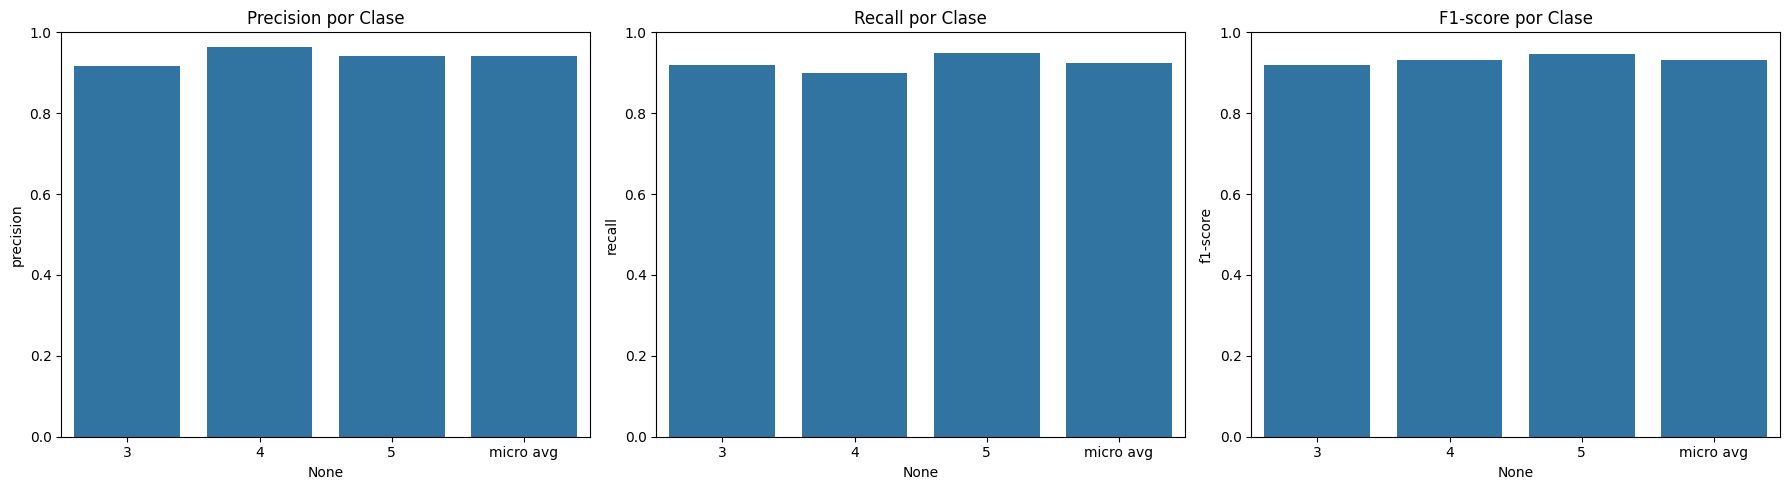

In [ ]:
# Generar el reporte de clasificación
report_dict = classification_report(y_test, y_pred, target_names=['3', '4', '5'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Filtrar solo las métricas de las clases (excluyendo "accuracy", "macro avg", etc.)
class_metrics = report_df.drop(['accuracy', 'macro avg', 'weighted avg', 'samples avg'], errors='ignore')

# Crear gráfico de barras para cada métrica
metrics = ['precision', 'recall', 'f1-score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x=class_metrics.index, y=class_metrics[metric], ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} por Clase')
    axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.show()


En esta sección, se evalúan las métricas principales del modelo, como precisión, recall y F1-score. Estas métricas se generan para cada clase del modelo y permiten entender cómo de bien el modelo clasifica los textos en los diferentes ODS.

Se presentan gráficos de barras que visualizan cada métrica para las clases sdg_3, sdg_4, y sdg_5. Las barras muestran cómo de bien el modelo está clasificando en cada caso y resaltan las posibles diferencias entre las clases.

### Analisis cualitativo

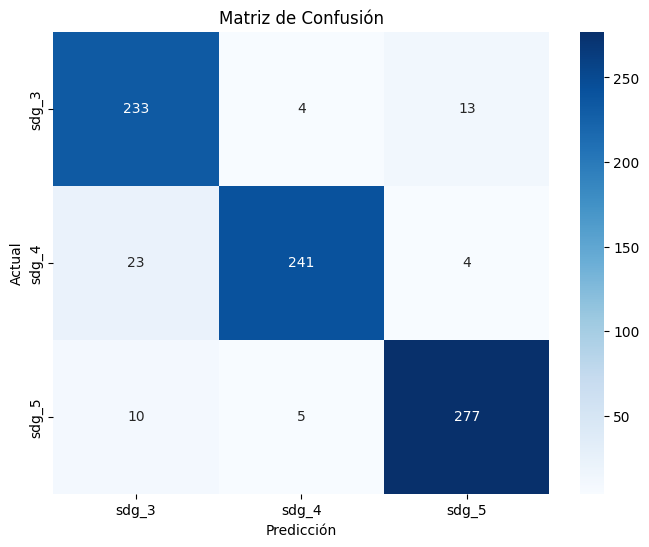

In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['sdg_3', 'sdg_4', 'sdg_5'], yticklabels=['sdg_3', 'sdg_4', 'sdg_5'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


Aquí se analiza el rendimiento del modelo mediante la matriz de confusión, que permite ver cuántas predicciones fueron correctas y en qué casos el modelo confundió una clase con otra.

La matriz de confusión muestra la cantidad de predicciones correctas en la diagonal principal y los errores fuera de la diagonal, ayudando a identificar clases que tienden a ser confundidas entre sí.

### Palabras significativas

Dimensiones de X_train: (3239, 206)
Características de X_train: Index(['length', 'words_count', 'punctuation_count', 'lexical_density',
       'stopwords_count', 'stopwords_ratio', 'mujeres', 'ms', 'salud', 'gnero',
       ...
       'tanto', 'tasas', 'tiempo', 'tienen', 'todos', 'trabajo', 'un', 'una',
       'vida', 'ya'],
      dtype='object', length=206)


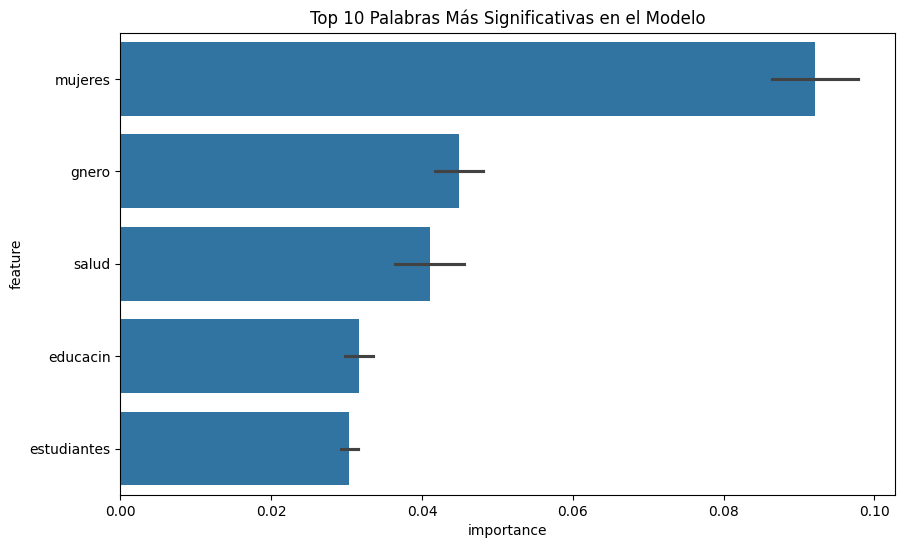

In [ ]:
# Revisar las dimensiones de X_train
print("Dimensiones de X_train:", X_train.shape)

# Revisar las características de X_train que fueron pasadas al modelo
print("Características de X_train:", X_train.columns)

# Obtener las características que realmente se utilizaron
used_features = X_train.columns[:len(rf.feature_importances_)]

# Crear el DataFrame de importancia de características con las que realmente fueron usadas
feature_importance_df = pd.DataFrame({
    'feature': used_features,
    'importance': rf.feature_importances_
})

# Ordenar por importancia y graficar las 10 más importantes
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Palabras Más Significativas en el Modelo')
plt.show()

En esta sección, se estudian las palabras más importantes para el modelo de Random Forest. Se utiliza un vectorizador para identificar qué palabras tienen mayor influencia en las predicciones de cada clase.

Se presenta un gráfico de barras que muestra las palabras más influyentes, indicando su peso relativo en el modelo. Esto da una idea de qué términos clave son importantes para que el modelo identifique correctamente cada ODS.

# Seccion 3. Estrategias

A partir del análisis de palabras, se puede definir estrategias dando un énfasis en aquellos problemas que más pueden afectar la población. Primero, se puede dar más relevancia a las condiciones que viven hombres y mujeres debido a la poca frecuencia de palabras en comparación con otros objetivos. También se debe hacer un énfasis de mejora en la educación especializándose en los estudiantes y profesores brindándoles herramientas para mejorar el sistema educativo. Finalmente es crucial tomar acción sobre el sistema de salud en cuanto a la calidad de tratamientos para evitar la propagación de enfermedades y posibles mortalidades.

# Sección 4. Predicción

In [ ]:
import pickle
filename = 'trained_model.csv'
pickle.dump(model1, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('/content/trained_model.csv', 'rb'))

In [ ]:
prueba = test_dataset.copy()
prueba['Cleaned'] = data_cleaning(prueba['Textos_espanol'].tolist())
X_test = prueba.Cleaned
X_test_data = vectorizer.transform(X_test)
X_test_data = transformer.transform(X_test_data).toarray()
y_pred = loaded_model.predict(X_test_data)
prueba['sdg'] = y_pred
prueba.drop(columns=['Cleaned'], inplace=True)
prueba['sdg'] = prueba['sdg'] + 3
prueba.to_csv('resultados.csv', index=False)

# Sección 5. Mapa de actores relacionado con el producto de datos creado

In [ ]:
actors_map = pd.read_csv(GITHUB_URL + 'actors_map.csv', sep=';')
print(tabulate.tabulate(actors_map, maxcolwidths=50, tablefmt='fancy_grid', headers=actors_map.columns, showindex=False))

╒═══════════════════════════════════════════════════╤═════════════════╤═══════════════════════════════════════════════════╤════════════════════════════════════════════════════╕
│ Rol dentro de la organización                     │ Tipo de actor   │ Beneficio                                         │ Riesgo                                             │
╞═══════════════════════════════════════════════════╪═════════════════╪═══════════════════════════════════════════════════╪════════════════════════════════════════════════════╡
│ Dirección de Políticas Públicas                   │ Usuario-cliente │ Facilita la identificación de problemas clave en  │ Si el modelo tiene un mal desempeño, podría        │
│                                                   │                 │ salud, educación y género, permitiendo crear      │ priorizar problemas irrelevantes y descuidar       │
│                                                   │                 │ políticas más eficientes y enfocadas en áre

# Sección 6. Trabajo en equipo

#### **Roles y tareas de cada integrante**

- **Líder de proyecto: Luis Ángel**
  - **Tareas**: Luis estuvo a cargo de la gestión general del proyecto, definiendo fechas clave para las reuniones y asegurando que cada tarea fuera asignada de manera equitativa entre los miembros del equipo. También verificó que cada entregable fuera presentado en los tiempos acordados y gestionó la carga final del proyecto en la plataforma correspondiente.
  - **Tiempo dedicado**: 27 horas.
  - **Retos enfrentados**: Uno de los principales desafíos fue coordinar los tiempos de trabajo de los demás integrantes, asegurando que todos cumplieran con los plazos sin sobrecargarse. También tuvo que tomar decisiones importantes cuando no había consenso en algunas soluciones analíticas, garantizando el avance del proyecto.

- **Líder de negocio y Líder de analítica: Santiago**
  - **Tareas**: Santiago se encargó de garantizar que el enfoque analítico del proyecto estuviera alineado con la estrategia del negocio y que resolviera el problema planteado. Además, lideró la parte de análisis de datos, asegurándose de que los modelos fueran optimizados y cumplieran con los requisitos del proyecto.
  - **Tiempo dedicado**: 35 horas.
  - **Retos enfrentados**: Los mayores retos estuvieron relacionados con la selección y optimización del mejor modelo para los datos, enfrentándose a restricciones de tiempo y recursos computacionales.

- **Líder de datos: David Mateo**
  - **Tareas**: David gestionó todo lo relacionado con la recopilación, limpieza y preparación de los datos utilizados en el proyecto. Aseguró que los datos estuvieran correctamente organizados y disponibles para todo el equipo a través de un repositorio compartido.
  - **Tiempo dedicado**: 20 horas.
  - **Retos enfrentados**: El principal reto fue la limpieza de los datos, ya que algunos estaban mal codificados o incompletos, lo que dificultó su uso inmediato en los modelos analíticos.

#### **Distribución de los puntos**
Según la contribución de cada integrante y los retos enfrentados, el equipo ha decidido repartir los 100 puntos de la siguiente manera:
- **Luis Ángel**: 30 puntos.
- **Santiago**: 40 puntos.
- **David Mateo**: 30 puntos.

#### **Reflexión y puntos a mejorar**
En general, el equipo ha funcionado bien, con una buena distribución de las tareas. Sin embargo, para la próxima entrega, se sugiere mejorar la **comunicación** en las fases iniciales del proyecto, para evitar retrasos en la definición de los algoritmos y la limpieza de datos. Además, se propondrán reuniones más regulares para el seguimiento de los avances.